In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
import sklearn.metrics

In [2]:
data = pd.read_excel("C:/Users/Donát/Documents/GitHub/-nkutfel/2019/2019_MAIN_CLEANED.xlsx")

In [3]:
#szűrjük ki a nem kategorikus vagy numerikus változókat
working_data = data.drop(labels = ["Name", "Neptun", "Tankör"], axis = 1)


#alakítsuk numerikussá a %-os teljesítménymutatókat
for i, row in working_data.iterrows():
    working_data.at[i, "Matek eredmény"] = float(row["Matek eredmény"][:-3] + "." + row["Matek eredmény"][-2])
    working_data.at[i, "Kognitív eredmény"] = float(row["Kognitív eredmény"][:-3] + "." + row["Kognitív eredmény"][-2])
    working_data.at[i, "Kognitív pont"] = float(str(row["Kognitív pont"]).replace(",", "."))
    working_data.at[i, "Össz eredmény (átlag)"] = float(row["Össz eredmény (átlag)"][:-3] + "." + row["Össz eredmény (átlag)"][-2])



In [4]:
#csináljunk a jegyek alapján 3 csoportot: a jó tanulók a 4-5, a rossz a 2-3, a bukás legyen 1
for i, row in working_data.iterrows():
    if working_data.at[i, "Matematika A1a - Analízis"] in [4, 5]:
        working_data.at[i, "Matematika A1a - Analízis"] = 3
    elif working_data.at[i, "Matematika A1a - Analízis"] in [2, 3]:
        working_data.at[i, "Matematika A1a - Analízis"] = 2

**Innen jönnek a Vegyészek:**

In [5]:
#VEGYÉSZEKRE innen
#kiszedjük a matek helyes, összes pont és össz eredmény változókat mert redundánsak
from imblearn.over_sampling import SMOTE
vegyesz = working_data.query("Szak == 'Vegyészmérnöki'")
features = vegyesz.drop(labels = ["Matematika A1a - Analízis", "Matematika A2c", "Szak", "Matek helyes", "Összes pont", "Össz eredmény (átlag)"], axis = 1)
label = vegyesz["Matematika A1a - Analízis"]
#itt nem tudunk SMOTE-t alkalmazni, mert csak egy darab 1-es lett
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

from sklearn import preprocessing
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train = quantile_transformer.fit_transform(X_train)
X_test = quantile_transformer.transform(X_test)

clf_veg = tree.DecisionTreeClassifier(random_state=0)
modell_veg = clf_veg.fit(X_train, y_train)

y_pred = modell_veg.predict(X_test)
y_tanito = modell_veg.predict(X_train)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')


Accuracy: 0.69
Precision: 0.48
Recall: 0.46


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (83). n_quantiles is set to n_samples.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
#KNN-re keresztvalidációval mahalanobis-szal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

print("With kNN:", end="\n")
neigh_dict_mahal = {}
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i, metric="mahalanobis", metric_params={'V': np.cov(m=X_train.astype(float), rowvar=False)}, weights='distance')
    scores_kNN = cross_val_score(neigh, X_train, y_train, scoring = "accuracy", cv=10)
    neigh_dict_mahal[scores_kNN.mean()] = i
print("Optimal number of neighbors:", neigh_dict_mahal[max(list(neigh_dict_mahal.keys()))], end="\n")

D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

With kNN:


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

Optimal number of neighbors: 11


In [7]:
neigh = KNeighborsClassifier(n_neighbors=neigh_dict_mahal[max(list(neigh_dict_mahal.keys()))], metric="mahalanobis", metric_params={'V': np.cov(m=X_train.astype(float), rowvar=False)}, weights='distance')
neigh = neigh.fit(X_train,y_train)
sk_pred = neigh.predict(X_test)
knn_mahal = round(sklearn.metrics.accuracy_score(y_test, sk_pred),2)
print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, sk_pred),2)}')


Accuracy: 0.75


In [8]:
#KNN-re keresztvalidációval euklidészi távolsággal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

print("With kNN:", end="\n")
neigh_dict_eu = {}
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i, metric="euclidean", weights='distance')
    scores_kNN = cross_val_score(neigh, X_train, y_train, scoring = "accuracy", cv=10)
    neigh_dict_eu[scores_kNN.mean()] = i
print("Optimal number of neighbors:", neigh_dict_eu[max(list(neigh_dict_eu.keys()))], end="\n")

D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

With kNN:


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

Optimal number of neighbors: 29


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

In [9]:
neigh = KNeighborsClassifier(n_neighbors=neigh_dict_eu[max(list(neigh_dict_eu.keys()))], metric="euclidean", weights='distance')
neigh = neigh.fit(X_train,y_train)
sk_pred = neigh.predict(X_test)
knn_eu = round(sklearn.metrics.accuracy_score(y_test, sk_pred),2)
print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, sk_pred),2)}')

Accuracy: 0.72


In [10]:
#összesítve kNN
print(f'kNN with Mahalanobis:')
print(f'- Optmial number of neighbours: {neigh_dict_mahal[max(list(neigh_dict_mahal.keys()))]} \n- Accuracy: {knn_mahal}')
print(f'kNN with Euclidean:')
print(f'- Optimal number of neighbours: {neigh_dict_eu[max(list(neigh_dict_eu.keys()))]} \n- Accuracy: {knn_eu}')

kNN with Mahalanobis:
- Optmial number of neighbours: 11 
- Accuracy: 0.75
kNN with Euclidean:
- Optimal number of neighbours: 29 
- Accuracy: 0.72


In [11]:
#tesztelés megfelelő C-hez SVM-nél
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

scores_svm = []
for i in range(1,100):
    clf = OneVsRestClassifier(SVC(C = i*0.1, class_weight = "balanced", random_state=0)).fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    scores_svm.append(round(sklearn.metrics.accuracy_score(y_test, y_pred),2))
print(scores_svm)

[0.47, 0.75, 0.75, 0.75, 0.75, 0.75, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.81, 0.81, 0.81, 0.81, 0.81, 0.81, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.75, 0.75, 0.75, 0.75, 0.75, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.75, 0.75, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]


In [12]:
#keresztvalidációval
from sklearn.model_selection import cross_val_score

svm_dict = {}
for i in range(1,50):
    clf = OneVsRestClassifier(SVC(C = i*0.1, class_weight = "balanced", random_state=0))
    scores_svm = cross_val_score(clf, X_train, y_train, scoring = "accuracy", cv=10)
    svm_dict[scores_svm.mean()] = i/10
print("Optimal value for C:",svm_dict[max(list(svm_dict.keys()))])

D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Optimal value for C: 1.3


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [13]:
#SVM-re
clf = OneVsRestClassifier(SVC(C = svm_dict[max(list(svm_dict.keys()))], class_weight = "balanced", random_state=0)).fit(X_train, y_train)     # balanced nélkül romlik a pontosság
y_pred = clf.predict(X_test)
svm_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')

Accuracy: 0.78
Precision: 0.53
Recall: 0.52


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
#logisztikus regresszióra
from sklearn.linear_model import LogisticRegression

logreg = OneVsRestClassifier(LogisticRegression(random_state=0, max_iter = 10000)).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
log_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')

Accuracy: 0.78
Precision: 0.79
Recall: 0.77


In [15]:
#Naive bayes-szel
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
bayes_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')

Accuracy: 0.78


In [16]:
#előző 3 összegzése:
print("Accuracy with different algorithms:")
print(f'- SVM: {svm_acc} \n- Logistic Regression: {log_acc} \n- Naive Bayes: {bayes_acc}')

Accuracy with different algorithms:
- SVM: 0.78 
- Logistic Regression: 0.78 
- Naive Bayes: 0.78


In [17]:
#ezek után nem oneVSall: lineáris regresszió
from sklearn.linear_model import LinearRegression

reg_alap = LinearRegression().fit(features,label)
reg_alap.score(features, label)                        #nem túl magas

0.31170610125474474

In [18]:
#most nézzük a tanítóhalmazon és a teszthalmazon

reg = LinearRegression().fit(X_train,y_train)
reg_pred = reg.predict(X_test)

#együtthatók
print("Coefficients:", reg.coef_)
#RMSE

rmse = round(np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5),2)
print("RMSE:", rmse)

Coefficients: [ 0.07864351  0.18726806 -0.05297236 -0.24709471 -0.2385096   0.75278953
 -4.29341138  4.44145645  0.19412589  0.12469727 -0.07748219  0.0432963 ]
RMSE: 0.39


In [19]:
#R^2 és SSR
SST = np.sum(np.power(y_test-np.mean(y_test),2))
SSR = np.sum(np.power(reg_pred-np.mean(y_test),2))
R2 = round(SSR/SST,2)
R2

0.26

In [20]:
#kerekítsük a becsült értékeket a legközelebbi egészhez!
for i in range(reg_pred.shape[0]):
    reg_pred[i] = round(reg_pred[i],0)
    
rmse_rounded = round(np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5),2)
print("RMSE:", rmse_rounded)
lin_acc = round(sklearn.metrics.accuracy_score(y_test, reg_pred),2)
print(round(sklearn.metrics.accuracy_score(y_test, reg_pred),2))

RMSE: 0.5
0.75


In [21]:
#lineáris regresszió összesen:
print("Linear regression:")
print(f'- RMSE: {rmse} \n- R2: {R2} \n- RMSE after rounding: {rmse_rounded} \n- Accuracy after rounding: {lin_acc}')

Linear regression:
- RMSE: 0.39 
- R2: 0.26 
- RMSE after rounding: 0.5 
- Accuracy after rounding: 0.75


In [22]:
#összes teljes mindenes
#összesítve kNN
print(f'kNN with Mahalanobis:')
print(f'- Optmial number of neighbours: {neigh_dict_mahal[max(list(neigh_dict_mahal.keys()))]} \n- Accuracy: {knn_mahal}')
print(f'kNN with Euclidean:')
print(f'- Optimal number of neighbours: {neigh_dict_eu[max(list(neigh_dict_eu.keys()))]} \n- Accuracy: {knn_eu}')
print("SVM:")
print(f'- Accuracy: {svm_acc}')
print("Logistic Regression:")
print(f'- Accuracy: {log_acc}')
print("Naive Bayes:")
print(f'- Accuracy: {bayes_acc}')
print("Linear regression:")
print(f'- RMSE: {rmse} \n- R2: {R2} \n- RMSE after rounding: {rmse_rounded} \n- Accuracy after rounding: {lin_acc}')

kNN with Mahalanobis:
- Optmial number of neighbours: 11 
- Accuracy: 0.75
kNN with Euclidean:
- Optimal number of neighbours: 29 
- Accuracy: 0.72
SVM:
- Accuracy: 0.78
Logistic Regression:
- Accuracy: 0.78
Naive Bayes:
- Accuracy: 0.78
Linear regression:
- RMSE: 0.39 
- R2: 0.26 
- RMSE after rounding: 0.5 
- Accuracy after rounding: 0.75


In [23]:
#főkomponens analízissel
#nézzük, mennyi főkomponenssel lesz a legjobb. (pl a logisztikus regresszió)
from sklearn.decomposition import PCA

scores = []

for i in range(1,9):
    projected = PCA(i).fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(projected, label, test_size=0.3, random_state=0)
    logreg = OneVsRestClassifier(LogisticRegression(random_state=0, max_iter = 10000)).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    scores.append(round(sklearn.metrics.accuracy_score(y_test, y_pred),2))
    
scores

[0.83, 0.83, 0.86, 0.86, 0.86, 0.81, 0.83, 0.75]

In [24]:
#főkomponenses logreg
from sklearn.decomposition import PCA
projected = PCA(3).fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(projected, label, test_size=0.3, random_state=0)

logreg = OneVsRestClassifier(LogisticRegression(random_state=0, max_iter = 10000)).fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')


Accuracy: 0.86
Precision: 0.86
Recall: 0.86


In [25]:
#nézzük meg, hogy főkompononensenként hogy változnak a különböző algoritmusok eredménymutatói, és rakjuk dataframe-be!
PCA_scores_vegy = pd.DataFrame({"Főkomponensek száma":[], "Logreg Acc.":[], "SVM Acc.":[], "Linreg RMSE":[], "Linreg R2":[], 
                           "Linreg RMSE kerekített":[], "Linreg Acc kerekített":[]})


for i in range(1,9):
    projected = PCA(i).fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(projected, label, test_size=0.3, random_state=0)
    
    logreg = OneVsRestClassifier(LogisticRegression(random_state=0, max_iter = 10000)).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    log_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)
    
    clf = OneVsRestClassifier(SVC(class_weight = "balanced", random_state=0)).fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    SVM_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)
    
    reg = LinearRegression().fit(X_train,y_train)
    reg_pred = reg.predict(X_test)
    rmse = round(np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5),2)
    SST = np.sum(np.power(y_test-np.mean(y_test),2))
    SSR = np.sum(np.power(reg_pred-np.mean(y_test),2))
    R2 = round(SSR/SST,2)
    
    for j in range(reg_pred.shape[0]):
        reg_pred[j] = round(reg_pred[j],0)
    rmse_rounded = round(np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5),2)
    reg_pred_rounded = round(sklearn.metrics.accuracy_score(y_test, reg_pred),2)
    
    #új sor a dataframe-be
    new_row = {"Főkomponensek száma":i, "Logreg Acc.":log_acc, "SVM Acc.":SVM_acc, "Linreg RMSE":rmse, "Linreg R2":R2, 
               "Linreg RMSE kerekített":rmse_rounded, "Linreg Acc kerekített":reg_pred_rounded}
    PCA_scores_vegy = PCA_scores_vegy.append(new_row, ignore_index=True)

In [26]:
PCA_scores_vegy

,Főkomponensek száma,Logreg Acc.,SVM Acc.,Linreg RMSE,Linreg R2,Linreg RMSE kerekített,Linreg Acc kerekített
0,1.0,0.83,0.81,0.37,0.21,0.41,0.83
1,2.0,0.83,0.81,0.39,0.22,0.41,0.83
2,3.0,0.86,0.78,0.37,0.25,0.37,0.86
3,4.0,0.86,0.78,0.38,0.25,0.33,0.89
4,5.0,0.86,0.78,0.38,0.24,0.41,0.83
5,6.0,0.81,0.78,0.38,0.24,0.41,0.83
6,7.0,0.83,0.78,0.38,0.24,0.37,0.86
7,8.0,0.75,0.78,0.38,0.25,0.44,0.81


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

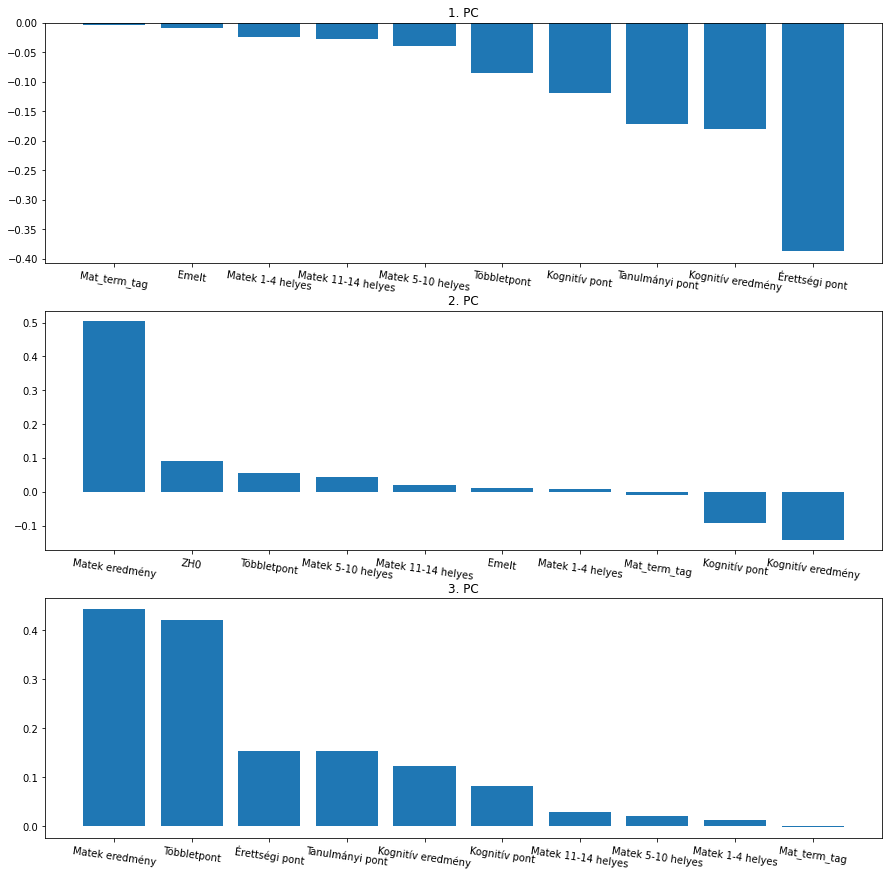

In [27]:
#nézzük meg, hogy mik lettek a főkomponensek
import matplotlib.pyplot as plt
projected = PCA(3).fit(features)

pca1 = [(features.columns[i],projected.components_[0][i]) for i in range(12)]
pca2 = [(features.columns[i],projected.components_[1][i]) for i in range(12)]
pca3 = [(features.columns[i],projected.components_[2][i]) for i in range(12)]

pca1.sort(key=lambda x: x[1], reverse = True)
pca2.sort(key=lambda x: x[1], reverse = True)
pca3.sort(key=lambda x: x[1], reverse = True)

plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.bar([pca1[i][0] for i in range(10)], [pca1[i][1] for i in range(10)])
plt.title("1. PC")
plt.xticks(rotation=-8)

plt.subplot(3,1,2)
plt.bar([pca2[i][0] for i in range(10)], [pca2[i][1] for i in range(10)])
plt.title("2. PC")
plt.xticks(rotation=-8)

plt.subplot(3,1,3)
plt.bar([pca3[i][0] for i in range(10)], [pca3[i][1] for i in range(10)])
plt.title("3. PC")
plt.xticks(rotation=-8)

**Biomérnököknél:**

In [28]:
#BIOMÉRNÖKÖKRE innen

bio = working_data.query("Szak == 'Biomérnöki'")
features = bio.drop(labels = ["Matematika A1a - Analízis", "Matematika A2c", "Szak", "Matek helyes", "Összes pont", "Össz eredmény (átlag)"], axis = 1)
label = bio["Matematika A1a - Analízis"]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

from sklearn import preprocessing
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train = quantile_transformer.fit_transform(X_train)
X_test = quantile_transformer.transform(X_test)

clf_veg = tree.DecisionTreeClassifier(random_state=0)
modell_veg = clf_veg.fit(X_train, y_train)

y_pred = modell_veg.predict(X_test)
y_tanito = modell_veg.predict(X_train)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')


Accuracy: 0.68
Precision: 0.35
Recall: 0.34


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (56). n_quantiles is set to n_samples.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#KNN-re keresztvalidációval mahalanobis-szal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

print("With kNN:", end="\n")
neigh_dict_mahal = {}
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i, metric="mahalanobis", metric_params={'V': np.cov(m=X_train.astype(float), rowvar=False)})
    scores_kNN = cross_val_score(neigh, X_train, y_train, scoring = "accuracy", cv=10)
    neigh_dict_mahal[scores_kNN.mean()] = i
print("Optimal number of neighbors:", neigh_dict_mahal[max(list(neigh_dict_mahal.keys()))], end="\n")

D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

With kNN:


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

Optimal number of neighbors: 7


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

In [30]:
neigh = KNeighborsClassifier(n_neighbors=neigh_dict_mahal[max(list(neigh_dict_mahal.keys()))], metric="mahalanobis", metric_params={'V': np.cov(m=X_train.astype(float), rowvar=False)})
neigh = neigh.fit(X_train,y_train)
sk_pred = neigh.predict(X_test)
knn_mahal = round(sklearn.metrics.accuracy_score(y_test, sk_pred),2)
print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, sk_pred),2)}')


Accuracy: 0.76


In [31]:
#KNN-re keresztvalidációval euklidészi távolsággal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

print("With kNN:", end="\n")
neigh_dict_eu = {}
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    scores_kNN = cross_val_score(neigh, X_train, y_train, scoring = "accuracy", cv=10)
    neigh_dict_eu[scores_kNN.mean()] = i
print("Optimal number of neighbors:", neigh_dict_eu[max(list(neigh_dict_eu.keys()))], end="\n")

With kNN:


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

Optimal number of neighbors: 13


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

In [32]:
neigh = KNeighborsClassifier(n_neighbors=neigh_dict_eu[max(list(neigh_dict_eu.keys()))], metric="euclidean")
neigh = neigh.fit(X_train,y_train)
sk_pred = neigh.predict(X_test)
knn_eu = round(sklearn.metrics.accuracy_score(y_test, sk_pred),2)
print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, sk_pred),2)}')

Accuracy: 0.76


In [33]:
#összesítve kNN
print(f'kNN with Mahalanobis:')
print(f'- Optmial number of neighbours: {neigh_dict_mahal[max(list(neigh_dict_mahal.keys()))]} \n- Accuracy: {knn_mahal}')
print(f'kNN with Euclidean:')
print(f'- Optimal number of neighbours: {neigh_dict_eu[max(list(neigh_dict_eu.keys()))]} \n- Accuracy: {knn_eu}')

kNN with Mahalanobis:
- Optmial number of neighbours: 7 
- Accuracy: 0.76
kNN with Euclidean:
- Optimal number of neighbours: 13 
- Accuracy: 0.76


In [34]:
#tesztelés megfelelő C-hez SVM-nél
scores_svm = []
for i in range(1,100):
    clf = OneVsRestClassifier(SVC(C = i*0.1, class_weight = "balanced", random_state=0)).fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    scores_svm.append(round(sklearn.metrics.accuracy_score(y_test, y_pred),2))
print(scores_svm)

[0.72, 0.68, 0.64, 0.68, 0.68, 0.68, 0.68, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.6, 0.6, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]


In [35]:
from sklearn.model_selection import cross_val_score

svm_dict = {}
for i in range(1,50):
    clf = OneVsRestClassifier(SVC(C = i*0.1, class_weight = "balanced", random_state=0))
    scores_svm = cross_val_score(clf, X_train, y_train, scoring = "accuracy", cv=10)
    svm_dict[scores_svm.mean()] = i/10
print("Optimal value for C:",svm_dict[max(list(svm_dict.keys()))])

D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\ot

D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Optimal value for C: 0.6


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [36]:
#SVM-re
clf = OneVsRestClassifier(SVC(C = svm_dict[max(list(svm_dict.keys()))], class_weight = "balanced", random_state=0)).fit(X_train, y_train)     # balanced nélkül romlik a pontosság
y_pred = clf.predict(X_test)
svm_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')

Accuracy: 0.68
Precision: 0.25
Recall: 0.3


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
#logisztikus regresszióra

logreg = OneVsRestClassifier(LogisticRegression(random_state=0, max_iter = 10000)).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
log_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')

Accuracy: 0.76
Precision: 0.38
Recall: 0.5


D:\anaconda3\envs\otthoni\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#Naive bayes-szel
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
bayes_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')

Accuracy: 0.56


In [39]:
#az előző 3 kiértékelése
print("Accuracy with different algorithms:")
print(f'- SVM: {svm_acc} \n- Logistic Regression: {log_acc} \n- Naive Bayes: {bayes_acc}')

Accuracy with different algorithms:
- SVM: 0.68 
- Logistic Regression: 0.76 
- Naive Bayes: 0.56


In [40]:
#lineáris regresszió

reg = LinearRegression().fit(X_train,y_train)
reg_pred = reg.predict(X_test)

#együtthatók
print("Coefficients:", reg.coef_)
#RMSE

rmse = round(np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5),2)
print("RMSE:", rmse)

Coefficients: [  0.02435129   0.71473189   0.44479595   0.91982877   0.47634496
  -1.09765439  15.70108433 -15.89559235  -0.29036916  -0.10270976
   0.44152676  -0.15555886]
RMSE: 0.5


In [41]:
#R^2 és SSR
SST = np.sum(np.power(y_test-np.mean(y_test),2))
SSR = np.sum(np.power(reg_pred-np.mean(y_test),2))
R2 = round(SSR/SST,2)
R2

0.37

In [42]:
#kerekítsük a becsült értékeket a legközelebbi egészhez!
for i in range(reg_pred.shape[0]):
    reg_pred[i] = round(reg_pred[i],0)
    
rmse_rounded = round(np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5),2)
print("RMSE:", rmse_rounded)
lin_acc = round(sklearn.metrics.accuracy_score(y_test, reg_pred),2)
print(round(sklearn.metrics.accuracy_score(y_test, reg_pred),2))

RMSE: 0.53
0.72


In [43]:
#lineáris regresszió összesen:
print("Linear regression:")
print(f'- RMSE: {rmse} \n- R2: {R2} \n- RMSE after rounding: {rmse_rounded} \n- Accuracy after rounding: {lin_acc}')

Linear regression:
- RMSE: 0.5 
- R2: 0.37 
- RMSE after rounding: 0.53 
- Accuracy after rounding: 0.72


In [44]:
#összes teljes mindenes
#összesítve kNN
print(f'kNN with Mahalanobis:')
print(f'- Optmial number of neighbours: {neigh_dict_mahal[max(list(neigh_dict_mahal.keys()))]} \n- Accuracy: {knn_mahal}')
print(f'kNN with Euclidean:')
print(f'- Optimal number of neighbours: {neigh_dict_eu[max(list(neigh_dict_eu.keys()))]} \n- Accuracy: {knn_eu}')
print("SVM:")
print(f'- Accuracy: {svm_acc}')
print("Logistic Regression:")
print(f'- Accuracy: {log_acc}')
print("Naive Bayes:")
print(f'- Accuracy: {bayes_acc}')
print("Linear regression:")
print(f'- RMSE: {rmse} \n- R2: {R2} \n- RMSE after rounding: {rmse_rounded} \n- Accuracy after rounding: {lin_acc}')

kNN with Mahalanobis:
- Optmial number of neighbours: 7 
- Accuracy: 0.76
kNN with Euclidean:
- Optimal number of neighbours: 13 
- Accuracy: 0.76
SVM:
- Accuracy: 0.68
Logistic Regression:
- Accuracy: 0.76
Naive Bayes:
- Accuracy: 0.56
Linear regression:
- RMSE: 0.5 
- R2: 0.37 
- RMSE after rounding: 0.53 
- Accuracy after rounding: 0.72


In [45]:
#főkomponens analízissel
#nézzük, mennyi főkomponenssel lesz a legjobb. (pl a logisztikus regresszió)
from sklearn.decomposition import PCA

scores = []

for i in range(1,9):
    projected = PCA(i).fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(projected, label, test_size=0.3, random_state=0)
    logreg = OneVsRestClassifier(LogisticRegression(random_state=0, max_iter = 10000)).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    scores.append(round(sklearn.metrics.accuracy_score(y_test, y_pred),2))
    
scores

[0.76, 0.76, 0.8, 0.8, 0.8, 0.8, 0.76, 0.76]

In [46]:
#főkomponenses logreg
from sklearn.decomposition import PCA
projected = PCA(3).fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(projected, label, test_size=0.3, random_state=0)

logreg = OneVsRestClassifier(LogisticRegression(random_state=0, max_iter = 10000)).fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(f'Accuracy: {round(sklearn.metrics.accuracy_score(y_test, y_pred),2)}')
print(f'Precision: {round(sklearn.metrics.precision_score(y_test, y_pred, average = "macro"),2)}')
print(f'Recall: {round(sklearn.metrics.recall_score(y_test, y_pred, average = "macro"),2)}')

#nagyon jó eredmény

Accuracy: 0.8
Precision: 0.9
Recall: 0.58


In [47]:
#nézzük meg, hogy főkompononensenként hogy változnak a különböző algoritmusok eredménymutatói, és rakjuk dataframe-be!
PCA_scores_bio = pd.DataFrame({"Főkomponensek száma":[], "Logreg Acc.":[], "SVM Acc.":[], "Linreg RMSE":[], "Linreg R2":[], 
                           "Linreg RMSE kerekített":[], "Linreg Acc kerekített":[]})


for i in range(1,9):
    projected = PCA(i).fit_transform(features)
    X_train, X_test, y_train, y_test = train_test_split(projected, label, test_size=0.3, random_state=0)
    
    logreg = OneVsRestClassifier(LogisticRegression(random_state=0, max_iter = 10000)).fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    log_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)
    
    clf = OneVsRestClassifier(SVC(class_weight = "balanced", random_state=0)).fit(X_train, y_train)    
    y_pred = clf.predict(X_test)
    SVM_acc = round(sklearn.metrics.accuracy_score(y_test, y_pred),2)
    
    reg = LinearRegression().fit(X_train,y_train)
    reg_pred = reg.predict(X_test)
    rmse = round(np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5),2)
    SST = np.sum(np.power(y_test-np.mean(y_test),2))
    SSR = np.sum(np.power(reg_pred-np.mean(y_test),2))
    R2 = round(SSR/SST,2)
    
    for j in range(reg_pred.shape[0]):
        reg_pred[j] = round(reg_pred[j],0)
    rmse_rounded = round(np.power(np.sum(np.power(y_test - reg_pred, 2))/reg_pred.shape[0],0.5),2)
    reg_pred_rounded = round(sklearn.metrics.accuracy_score(y_test, reg_pred),2)
    
    #új sor a dataframe-be
    new_row = {"Főkomponensek száma":i, "Logreg Acc.":log_acc, "SVM Acc.":SVM_acc, "Linreg RMSE":rmse, "Linreg R2":R2, 
               "Linreg RMSE kerekített":rmse_rounded, "Linreg Acc kerekített":reg_pred_rounded}
    PCA_scores_bio = PCA_scores_bio.append(new_row, ignore_index=True)

In [48]:
PCA_scores_bio

,Főkomponensek száma,Logreg Acc.,SVM Acc.,Linreg RMSE,Linreg R2,Linreg RMSE kerekített,Linreg Acc kerekített
0,1.0,0.76,0.48,0.42,0.11,0.49,0.76
1,2.0,0.76,0.72,0.42,0.11,0.49,0.76
2,3.0,0.80,0.72,0.42,0.17,0.45,0.80
3,4.0,0.80,0.72,0.41,0.18,0.45,0.80
4,5.0,0.80,0.76,0.42,0.19,0.45,0.80
5,6.0,0.80,0.80,0.42,0.15,0.49,0.76
6,7.0,0.76,0.80,0.42,0.17,0.49,0.76
7,8.0,0.76,0.80,0.43,0.18,0.49,0.76
